# Dependency Installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install PyWavelets
!pip install pyentrp

In [ ]:
import pywt
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from scipy import signal

# Feature Extraction

In [ ]:
def energy_wavelet(coefficient,level_scaling):
  Energy_detail=[] # ini per level scala hasil transformasi wavelet
  energy=0

  for skala in range(coefficient.shape[0]):
    energy=energy+np.sum(np.array(coefficient[-skala])**2)
    Especific.append(np.sum(np.array(coefficient[-skala])**2))

    return energy,Especific


def WaveletTransform():
  pass

# Utility Function

In [ ]:
def plot_wavelet(time, signal, 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Frequency', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    scale=np.arange(30,160) # scale=30-160
    #objective : 
    # mencari rentang frekuensi 30 - 70 Hz
    # localisasi waktu lebih diutamakan
    # semakin kecil scale, semakin terlihat jelas perubahan terhadap waktu dibanding frekuensi

    Motherwavelet=pywt.ContinuousWavelet('morl')
    [coefficient,freq]=pywt.cwt(signal,scale,wavelet=Motherwavelet)
    power = (abs(coefficient)) ** 2
    period = 1. / freq
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    fig.subplots_adjust(top=1)
    plt.show()

# Load File 

In [ ]:
sampelfile="/content/drive/My Drive/DataSetSuaraJantungPhysionet/Dataset/training-a/a0007.wav"

#read file,set to default SR from file
#note SR File Dataset default 2000 Hz
x,sr=librosa.load(sampelfile,sr=None)
x=x[:int(sr*5)]

#do bandpass filter
sos = signal.butter(4, [25, 400], 'bandpass', fs=sr, output='sos')
filtered = signal.sosfilt(sos, x)
dt= 0.0005 #sampling rate
N = filtered.shape[0]
t0=0
time = np.arange(0, N) * dt + t0
print(x.shape)

(10000,)


# Plot Time Series

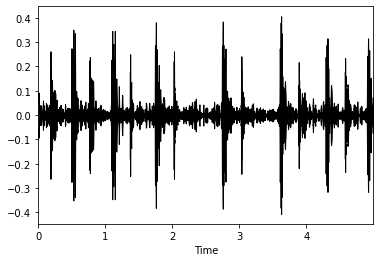

In [ ]:
#plot Time Series
plt.figure()
plt.subplot(1, 1, 1)
librosa.display.waveplot(x, sr=sr,color='black')


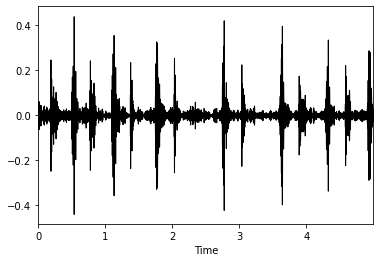

In [ ]:
#plot Time Filtered
plt.figure()
plt.subplot(1, 1, 1)
librosa.display.waveplot(filtered, sr=sr,color='black')


# Wavelet Analysis

In [ ]:
scale=0
scale=np.arange(30,160) # scale=30-160
#objective : 
# mencari rentang frekuensi 30 - 70 Hz
# localisasi waktu lebih diutamakan
# semakin kecil scale, semakin terlihat jelas perubahan terhadap waktu dibanding frekuensi

Motherwavelet=pywt.ContinuousWavelet('morl')
[coefficient,freq]=pywt.cwt(filtered,scale,wavelet=Motherwavelet)
print(coefficient.shape)
plot_wavelet(time=time,signal=filtered)

(130, 10000)


# Plot on Frequency Domain

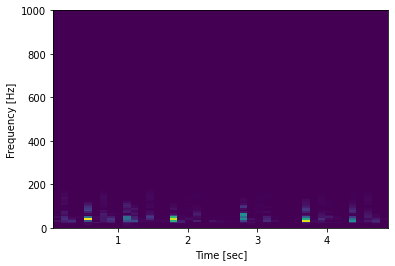

In [ ]:
#check frequency domain 
from scipy import signal
from scipy.fft import fftshift


f, t, Sxx = signal.spectrogram(filtered, sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
#test audio
import IPython.display as ipd
ipd.Audio(filtered,rate=sr) # load a NumPy array

# Feature Extraction (another two)

In [ ]:
def distrubusi_energi(a,b,coefficient):
  result=[]
  for skala in range(coefficient.shape[0]):
    #lakukan proses integral metode quad
    [buffer,error]=integrate.quad(lambda x:Especific[-skala],0,coefficient.shape[1])
    result.append(buffer)


  P=np.divide(Especific,result)
  logP=np.log10(P)
  Fungsi=np.multiply(P,logP)

  #lakukan proses integrasi menggunakan metode trapesium
  return (-numpy.trapz(Fungsi,dx=0.01))

def shannonEntropy(Especific):
  shannon_entropy=-np.sum(np.dot(Especific,np.log(Especific)))
  return shannon_entropy

def energy_wavelet(coefficient_wavelet):
  pass

In [ ]:
#try to implement PCA
from sklearn.decomposition import PCA
pca = PCA(130) #mengambil hanya 95% data penting saja
pca.fit(coefficient)
print(pca.transform(coefficient).shape)

(130, 130)


In [ ]:
#energy wavelet
Especific=[]
energy=0
for skala in range(coefficient.shape[0]):
  buffer=0
  buffer=np.sum(np.array(coefficient[-skala])**2)
  energy=energy+buffer
  Especific.append(buffer)

print(energy) #fungsi diatas udah bener

print(Especific) #ini udah bener

#relative wavelet energy
print(np.sum(np.divide(Especific,energy))) #sigma detail energi dibanding energy overall harus sama dengan 1

0.16113174799829721
[0.0010160496, 0.12548646, 0.0275349, 0.007094335]
0.99999994


In [ ]:
#Distribusi energi temporal
import scipy.integrate as integrate
import numpy
result=[]
for skala in range(coefficient.shape[0]):
  [buffer,error]=integrate.quad(lambda x:Especific[-skala],0,coefficient.shape[1])
  result.append(buffer)


P=np.divide(Especific,result)
logP=np.log10(P)
Fungsi=np.multiply(P,logP)
print(-numpy.trapz(Fungsi,dx=0.01))

5.483200742495244e-05


In [ ]:
# normalisasi
filtered=filtered-np.mean(filtered)
filtered=np.divide(filtered,np.max(np.absolute(filtered)))
print(np.max(filtered),np.min(filtered))

0.9219859692694933 -1.0


In [ ]:
#multiscale  entropy
from pyentrp import entropy as ent
import numpy as np

sample_entropy = ent.multiscale_entropy(filtered, 2, 0.25 ,maxscale=20)

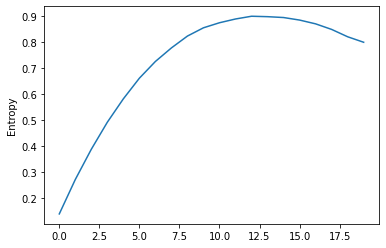

In [ ]:
#plot entropy terhadap skala
mscale=np.arange(0,20)

import matplotlib.pyplot as plt
plt.plot(mscale,sample_entropy)
plt.ylabel('Entropy')
plt.show()